Computational Neurophysiology Laboratory, Brain Institute, UFRN, Brazil<br>
Rodrigo MM Santiago<br>
2023

# CSDbC
*Current source density-based classification of dentate spikes*

### Function import

**Custom functions**

In [1]:
import dentatespike as ds

**Scientific modules and functions**

In [2]:
import numpy as np # numerical operations
import pickle      # for data saving

# for plotting
import matplotlib.pyplot as plt
import matplotlib.colors as colors
%matplotlib inline

In [3]:
from importlib import reload

### Data loading

In [4]:
LFP          = pickle.load(open("LFP.txt","rb"))          # LFP (16 channels)
srate        = pickle.load(open("srate.txt","rb"))        # sampling rate (Hz)
DS_ind       = pickle.load(open("DS_ind.txt","rb"))       # DS indexes
DS_waveforms = pickle.load(open("DS_waveforms.txt","rb")) # DS waveforms
t_waveform   = pickle.load(open("t_waveform.txt","rb"))   # time vector of the DS waveforms

### DS classification based on CSD

In [5]:
class_prob, DS_classes_CSDbC, DS1_ind_CSDbC, DS2_ind_CSDbC = ds.classification.CSDbC(LFP, DS_ind)

In [6]:
# Waveforms of each DS type
DS1_waveforms_CSDbC = DS_waveforms[(DS_classes_CSDbC*-1+1).astype(bool),:]
DS2_waveforms_CSDbC = DS_waveforms[(DS_classes_CSDbC).astype(bool),:]

Man waveforms and widths of each DS type:

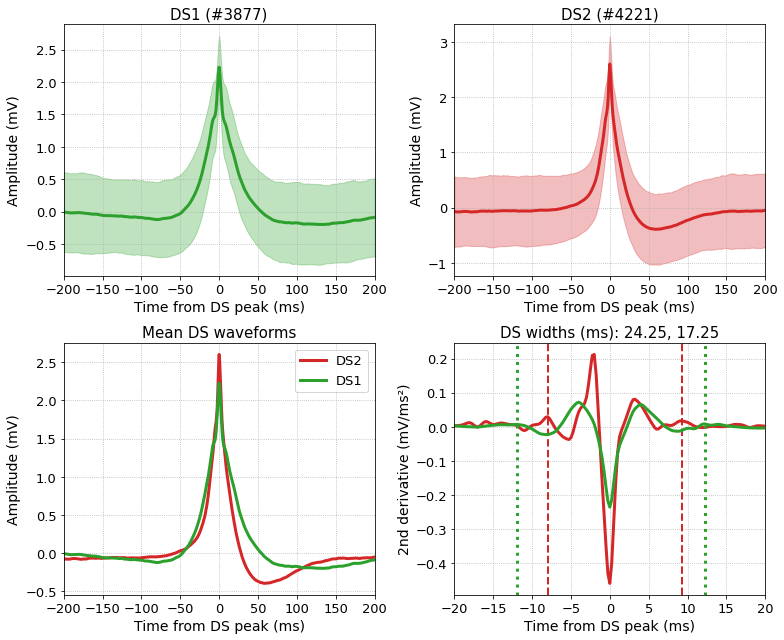

In [7]:
ds.analysis.plotDSclass(DS_classes_CSDbC,DS1_waveforms_CSDbC,DS2_waveforms_CSDbC,t_waveform);

### CSD profiles of each DS type

In [8]:
CSD, csd_t, csd_ch_list = ds.analysis.CSDmatrix(LFP, DS_ind) # computes the CSD of each DS

In [9]:
ind_DS1_CSDbC = np.concatenate(np.argwhere(DS_classes_CSDbC*(-1)+1)) # DS1 indexes in DS classes array
ind_DS2_CSDbC = np.concatenate(np.argwhere(DS_classes_CSDbC))        # DS2 indexes in DS classes array

CSD_DS1_CSDbC = CSD[ind_DS1_CSDbC] # CSD profiles of DS1
CSD_DS2_CSDbC = CSD[ind_DS2_CSDbC] # CSD profiles of DS2

Mean CSD profiles of each DS type:

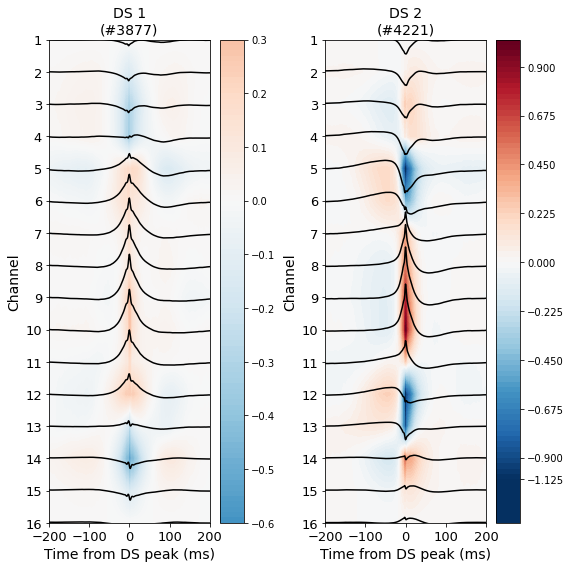

In [10]:
plt.figure(figsize=(8,8))

plt.subplot(121)
ds.analysis.plotDSCSD(csd_t,csd_ch_list,np.mean(CSD_DS1_CSDbC,axis=0),'DS 1',
                    t_waveform,DS1_ind_CSDbC,LFP)
plt.subplot(122)
ds.analysis.plotDSCSD(csd_t,csd_ch_list,np.mean(CSD_DS2_CSDbC,axis=0),'DS 2',
                    t_waveform,DS2_ind_CSDbC,LFP)

plt.tight_layout();

Concatenated CSDs for each DS type:

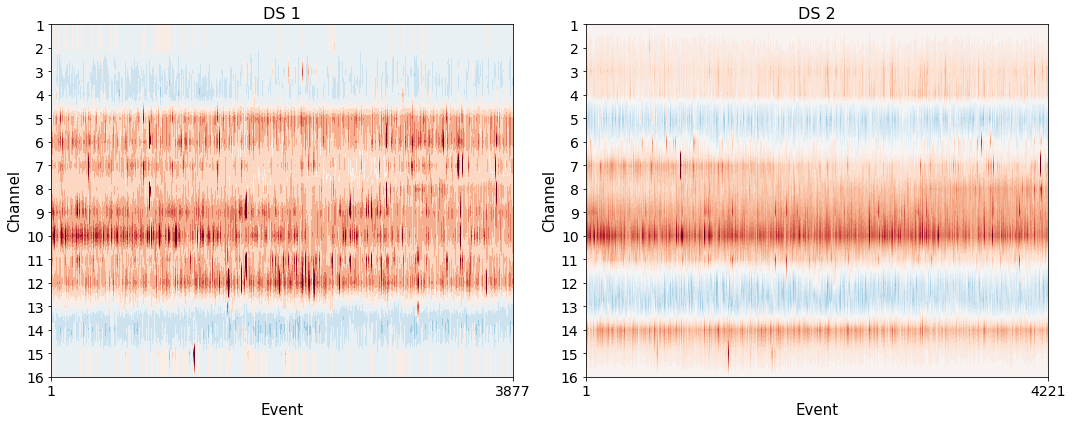

In [11]:
plt.figure(figsize=(15,6))

plt.subplot(121)
ds.analysis.plotConcCSD(CSD_DS1_CSDbC,'DS 1',vrange=['std',4])

plt.subplot(122)
ds.analysis.plotConcCSD(CSD_DS2_CSDbC,'DS 2',vrange=['std',4])

plt.tight_layout();

### Data saving

In [12]:
pickle.dump(DS_classes_CSDbC,open("DS_classes_CSDbC.txt","wb"))